> 說明用 # 表示，若發生某些事件才需要用到則用 """ 表示

### **讀入資料**

> 可以從第一個實作複製過來

In [43]:
import pandas as pd

url = ".../chinese_science_score.csv"
data = pd.read_csv(url)

""" 若資料格式最後有一空值，就 drop 掉它
data = data.dropna(axis=1)
"""

# 顯示資料
data

,chinese,science,Unnamed: 2
0,64,93,NaN
1,78,91,NaN
2,69,84,NaN
3,52,65,NaN
4,45,78,NaN
5,48,36,NaN
6,78,77,NaN
7,75,82,NaN
8,78,92,NaN
9,32,78,NaN


### **計算 loss function**

> 設定 x, y（上一個實作一樣有）

In [57]:
x = data['chinese']
y = data['science']

> 計算 (a, b) = (0, 0) 的 loss 值

In [58]:
a = 0
b = 0
y_pred = a*x + b
# 計算
loss = (y - y_pred)**2

# 觀察 loss 值
loss.sum() # 先看加總
loss.sum() / len(x) # 再多一個平均

5765.323529411765

> 用 function 包起來

In [59]:
#  用 function 包起來
def compute_loss(x, y, a, b):
    y_pred = a*x + b
    loss = (y - y_pred)**2
    loss = loss.sum() / len(x)  # 記得增加 loss = 平均（上一行）

    return loss

> 測試 function

In [60]:
# 可以看到跟上面還沒有用 function 包起來的數值是一樣的
compute_loss(x, y, 0, 0)

5765.323529411765

### 固定 b 值，觀察 loss

> a = [-100, 100], b = 0

In [61]:
loss_all = []

for a in range(-100, 101):
    loss = compute_loss(x, y, a, 0)
    loss_all.append(loss)

# 輸出 loss_all 觀察結果
loss_all

[33760777.0882353,
 33096692.94117647,
 32439205.44117647,
 31788314.588235293,
 31144020.38235294,
 30506322.82352941,
 29875221.911764707,
 29250717.647058822,
 28632810.029411763,
 28021499.05882353,
 27416784.73529412,
 26818667.05882353,
 26227146.029411763,
 25642221.647058822,
 25063893.911764707,
 24492162.82352941,
 23927028.38235294,
 23368490.588235293,
 22816549.44117647,
 22271204.94117647,
 21732457.088235293,
 21200305.88235294,
 20674751.32352941,
 20155793.411764707,
 19643432.147058822,
 19137667.529411763,
 18638499.55882353,
 18145928.23529412,
 17659953.55882353,
 17180575.529411763,
 16707794.147058824,
 16241609.411764706,
 15782021.323529411,
 15329029.88235294,
 14882635.088235294,
 14442836.94117647,
 14009635.44117647,
 13583030.588235294,
 13163022.38235294,
 12749610.823529411,
 12342795.911764706,
 11942577.647058824,
 11548956.029411765,
 11161931.05882353,
 10781502.735294119,
 10407671.05882353,
 10040436.029411765,
 9679797.647058824,
 9325755.91176470

> 畫圖觀察結果

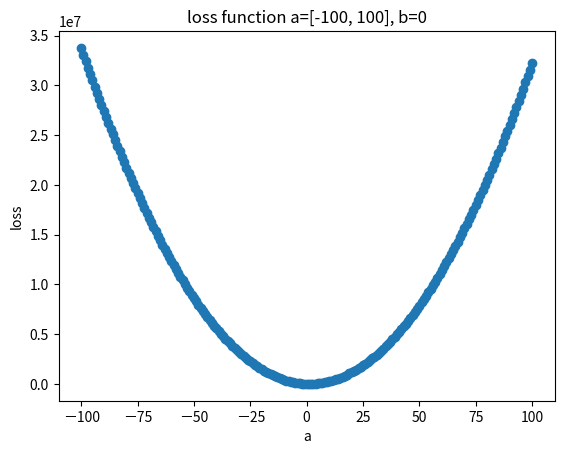

In [62]:
import matplotlib.pyplot as plt

# 記得把畫點的變成把所有點連在一起
plt.scatter(range(-100, 101), loss_all) # 畫出每一個點
plt.plot(range(-100, 101), loss_all) # 將所有點連起來

plt.title("loss function a=[-100, 100], b=0")
plt.xlabel("a")
plt.ylabel("loss")

plt.show()

### **窮舉所有 a, b 值得 loss**

> a = [-100, 100], b = [-100, 100]

In [63]:
import numpy as np

a_all = np.arange(-100, 101)
b_all = np.arange(-100, 101)
loss_all = np.zeros((201, 201))

i = 0
for a in a_all:
    j = 0
    for b in b_all:
        loss = compute_loss(x, y, a, b)
        loss_all[i, j] = loss
        j = j+1
    i = i+1


> 觀察 a_all, b_all, loss_all

In [64]:
a_all

array([-100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,  -91,  -90,
        -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,  -80,  -79,
        -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,  -69,  -68,
        -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,  -58,  -57,
        -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,  -47,  -46,
        -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,  -36,  -35,
        -34,  -33,  -32,  -31,  -30,  -29,  -28,  -27,  -26,  -25,  -24,
        -23,  -22,  -21,  -20,  -19,  -18,  -17,  -16,  -15,  -14,  -13,
        -12,  -11,  -10,   -9,   -8,   -7,   -6,   -5,   -4,   -3,   -2,
         -1,    0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
         10,   11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
         21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   31,
         32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,
         43,   44,   45,   46,   47,   48,   49,   

> 目標
> - 觀察 3D 圖片
> - 畫出曲面圖（plot_surface）
> - 網格化 a_all 和 b_all（meshgrid）
> - 把網格畫出來（plot_wireframe）
>> **尋找最低的 loss 值在哪裡**

> 可自行嘗試
- 設定背景顏色
- 增加中文字體
- 設定資訊（標題，軸線名稱）
- 查看視角的改變
- 設定圖片大小（figure）

[100] [172] [0] [72]


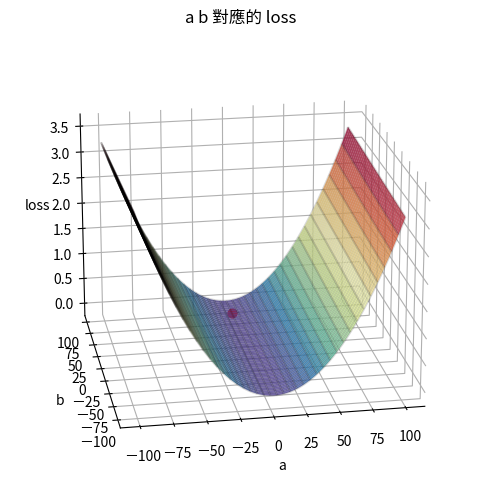

In [65]:
plt.figure(figsize=(6, 6)) # 圖片大小

ax = plt.axes(projection = "3d")
ax.view_init(20, -100) # 查看視角
ax.xaxis.set_pane_color((1, 1, 1)) # 背景顏色
ax.yaxis.set_pane_color((1, 1, 1))
ax.zaxis.set_pane_color((1, 1, 1))

b_grid, a_grid = np.meshgrid(b_all, a_all) # 網格化
#############################################   https://wangyeming.github.io/2018/11/12/numpy-meshgrid/
""" ax.plot_surface(aa, bb, loss_all) # 未網格化前 """
ax.plot_surface(a_grid, b_grid, loss_all, cmap="Spectral_r", alpha=0.8)
ax.plot_wireframe(a_grid, b_grid, loss_all, color="black", alpha=0.15)

# 設定資訊
ax.set_title("a b 對應的 loss")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("loss")

# 尋找 loss 最少的點
# print(np.min(loss_all))
a_index, b_index = np.where(loss_all == np.min(loss_all))
print(a_index, b_index, a_all[a_index], b_all[b_index])
ax.scatter(a_all[a_index], b_all[b_index], loss_all[a_index, b_index], color="red", s=40)

plt.show()

> 加上中文字體

In [66]:
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont("ChineseFont.ttf")
mlp.rc('font', family = "ChineseFont")

> 測試得到的 a, b 它的 loss 值是多少？

In [67]:
compute_loss(x, y, a_all[a_index], b_all[b_index])

# 結果去跟上面的陣列比較

602.5

## ``` 理科 = a_all[a_index] * 文科 + b_all[b_index] ```

In [36]:
# 請大家跟自己當初填的表單數值是否呼應？